Using Rena's larger dataset

In [0]:
# Here we import everything we need for the project

%matplotlib inline
from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

import imutils 
from imutils import paths
from keras.optimizers import SGD

print(tf.__version__)

Using TensorFlow backend.


1.15.0


In [0]:
!unzip /content/IncreasedRenaHandGest2.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b240.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b241.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b242.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b243.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b244.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b245.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b246.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b247.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b248.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b249.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b25.jpg  
  inflating: /content/IncreasedRenaHandGest2/Victory_05/5/class5_inv_b

In [0]:
from imutils import paths
import cv2
import os
import matplotlib.pyplot as plt

In [0]:
path='/content/IncreasedRenaHandGest2'
imagePaths = list(paths.list_images(path))
rawImages = []
labels = []
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[3].split("_")[1]
    if imagePath.endswith("jpg"): # We want only the images
       rawImages.append(image)
       labels.append(label)
 
    # show an update every 100 images
    if i > 0 and i % 100 == 0:
        print(imagePath)
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

/content/IncreasedRenaHandGest2/OK_01/IMG_20200222_122330.jpg
[INFO] processed 100/20600
/content/IncreasedRenaHandGest2/OK_01/IMG_20200222_122156.jpg
[INFO] processed 200/20600
/content/IncreasedRenaHandGest2/OK_01/IMG_20200222_122240.jpg
[INFO] processed 300/20600
/content/IncreasedRenaHandGest2/OK_01/01/chan_0_01_178.jpg
[INFO] processed 400/20600
/content/IncreasedRenaHandGest2/OK_01/01/chan_0_01_82.jpg
[INFO] processed 500/20600
/content/IncreasedRenaHandGest2/OK_01/01/chan_0_01_66.jpg
[INFO] processed 600/20600
/content/IncreasedRenaHandGest2/OK_01/01/chan_0_01_264.jpg
[INFO] processed 700/20600
/content/IncreasedRenaHandGest2/OK_01/2/class2_inv_b299.jpg
[INFO] processed 800/20600
/content/IncreasedRenaHandGest2/OK_01/2/class2_b46.jpg
[INFO] processed 900/20600
/content/IncreasedRenaHandGest2/OK_01/2/class2_b336.jpg
[INFO] processed 1000/20600
/content/IncreasedRenaHandGest2/OK_01/2/class2_b11.jpg
[INFO] processed 1100/20600
/content/IncreasedRenaHandGest2/OK_01/2/class2_inv_b273

In [0]:
labels[1200]

'01'

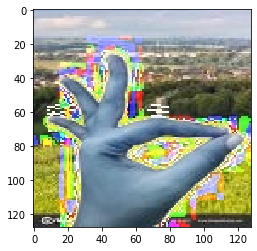

In [0]:
plt.imshow(rawImages[1200])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
rawImages = np.array(rawImages)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 988.80MB


In [0]:
ts = 0.2 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(rawImages, labels, test_size=ts, random_state=42)

In [0]:
z_train = [int(i) for i in y_train]
z_test = [int(i) for i in y_test]
z_train = np.array(z_train)
z_test = np.array(z_test)

In [0]:
z_test.shape

(4120,)

In [0]:
z_train.shape

(16480,)

In [0]:
from keras.utils import np_utils
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
y_test.shape

(4120, 10)

In [0]:
X_test.shape

(4120, 128, 128, 3)

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm

In [0]:
# Model with 96.38 training and testing Accuracy
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(128, 128, 3), padding='same'))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.2)) #added
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
epochs = 20
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 16480 samples, validate on 4120 samples
Epoch 1/20





16480/16480 [==============================] - 170s 10ms/step - loss: 0.7350 - acc: 0.7475 - val_loss: 0.3616 - val_acc: 0.8806
Epoch 2/20
16480/16480 [==============================] - 150s 9ms/step - loss: 0.2137 - acc: 0.9326 - val_loss: 0.1073 - val_acc: 0.9675
Epoch 3/20
16480/16480 [==============================] - 151s 9ms/step - loss: 0.0511 - acc: 0.9839 - val_loss: 0.0706 - val_acc: 0.9803
Epoch 4/20
16480/16480 [==============================] - 150s 9ms/step - loss: 0.0159 - acc: 0.9958 - val_loss: 0.0545 - val_acc: 0.9840
Epoch 5/20
16480/16480 [==============================] - 150s 9ms/step - loss: 0.0086 - acc: 0.9976 - val_loss: 0.0429 - val_acc: 0.9908
Epoch 6/20
16480/16480 [==============================] - 150s 9ms/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0439 - val_acc: 0.9908
Epoch 7/20
16480/164

In [0]:
os.chdir('/content/drive/My Drive/')

In [0]:
model.save('TestingRenaHandGestureUsingCNN2.h5')

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

4120/4120 [==============================] - 10s 2ms/step
Test accuracy: 99.13%


In [0]:
predictions = model.predict(X_test) # Make predictions towards the test set
np.argmax(predictions[2]), z_test[2]

(8, 8)

In [0]:
#img1=cv2.imread('/content/drive/My Drive/My hand/Predict/thumbsUp.jpg') //Fail
#img1=cv2.imread('/content/drive/My Drive/My hand/Predict/ILY.jpg') //Fail
#img1=cv2.imread('/content/drive/My Drive/My hand/one.jpg') //Fail
#img1=cv2.imread('/content/drive/My Drive/My hand/Predict/yesPredict.jpg') //Pass
#img1=cv2.imread('/content/drive/My Drive/My hand/RenaFlip09/flipImg09_0.jpg') //Pass
#img1=cv2.imread('/content/drive/My Drive/My hand/Predict/ok.jpg') //Pass
#img1=cv2.imread('/content/drive/My Drive/My hand/Predict/small.jpg') //Pass
#img1=cv2.imread('/content/drive/My Drive/My hand/Predict/your.jpg') //Pass
#img1=cv2.imread('/content/drive/My Drive/My hand/Predict/victory.jpg') //Pass
#img1=cv2.imread('/content/drive/My Drive/My hand/Predict/thumbsDown.jpg') //Pass
#img1=cv2.imread('/content/drive/My Drive/My hand/Predict/OhISee.jpg') //Pass
img1=cv2.imread('/content/drive/My Drive/My hand/Predict/OhISee.jpg')
img1 = cv2.resize(img1, (128,128))

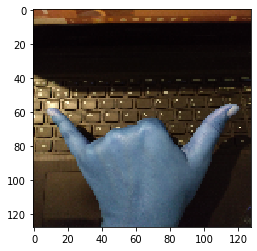

In [0]:
plt.imshow(img1)

In [0]:
img1 = np.array(img1)
img1 = img1.astype('float32')
img1 = img1 / 255.0

In [0]:
img1 = np.expand_dims(img1, axis=0)
img1.shape

(1, 128, 128, 3)

In [0]:
p=model.predict(img1)

In [0]:
class_names = ["I Love You", "Okay", "Thumbs Up", "Thumbs Down", "Yes", "Victory", "Little", "One", "Your", "Oh I See"]

In [0]:
predicted_label = np.argmax(p)

In [0]:
print(predicted_label)

9


In [0]:
print(class_names[predicted_label])

Oh I See


In [0]:
!pip install gtts

In [0]:
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class
tts = gTTS('ok') #Provide the string to convert to speech
tts.save('1.wav') #save the string converted to speech as a .wav file
sound_file = '1.wav'
Audio(sound_file, autoplay=True)

In [0]:
# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["I Love You", "Okay", "Thumbs Up", "Thumbs Down", "Yes", "Victory", "Little", "One", "Your", "Oh I See"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 101):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    #img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(10,10,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

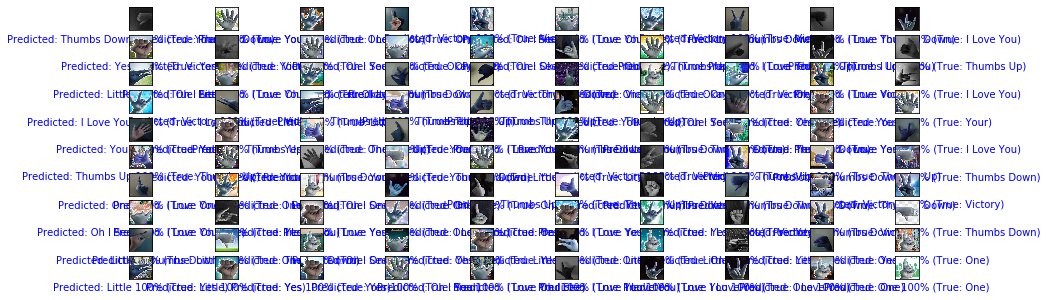

In [0]:
validate_9_images(predictions, z_test, X_test)